# Inroduction

Hello dear researcher. We continue our series on YOLO where we left off. I have previously shown you how to train YOLO using your own dataset on YOLOv7, YOLOv8, and YOLOv9 and how to make predictions with the trained model at the end of training. In this work, I will focus on YOLOv10 and will experiment on this version, just like in our previous YOLO studies. Previous YOLO studies can also be placed under this section. I hope you like my work. I wish you a good day and good work.

YOLO Works:
- [YoloV7](https://www.kaggle.com/code/ihsncnkz/face-mask-detection-with-yolov7)
- [YoloV8](https://www.kaggle.com/code/ihsncnkz/face-mask-detection-with-yolov8)
- [YoloV9](https://www.kaggle.com/code/ihsncnkz/face-mask-detection-with-yolov9)

My Social Media Adress:
- [Linkedin](https://www.linkedin.com/in/ihsancenkiz/)
- [GitHub](https://github.com/ihsncnkz)

# Content <a id = 'cont'></a>
- [Data Review](#1)
- [Preparing Data](#2)
- [Preparing Training Data](#3)
- [YoloV10](#4)
- [Detection](#5)
- [CONCLUSION](#6)

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 33.6 MB/s eta 0:00:00


In [2]:
# Python librarys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

## Data Review <a id = '1'></a>
[Go Content](#cont)<br>
I will review the face mask data.

In [3]:
# This is a label from the annotation folder. This label is .xml format.
with open('/kaggle/input/face-mask-detection/annotations/maksssksksss0.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

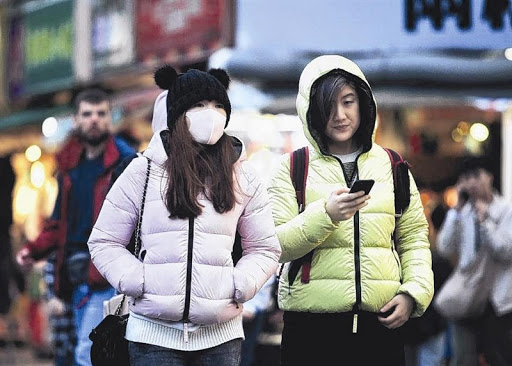

In [4]:
# This is image from the images folder.
Image.open("/kaggle/input/face-mask-detection/images/maksssksksss0.png")

In [5]:
with open('/kaggle/input/face-mask-detection/annotations/maksssksksss122.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss122.png</filename>
    <size>
        <width>400</width>
        <height>267</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>201</xmin>
            <ymin>38</ymin>
            <xmax>345</xmax>
            <ymax>213</ymax>
        </bndbox>
    </object>
</annotation>


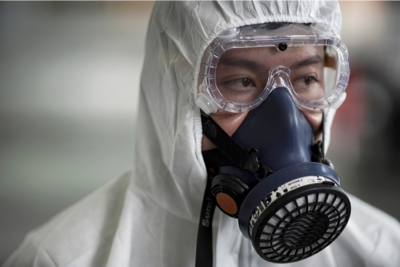

In [6]:
Image.open("/kaggle/input/face-mask-detection/images/maksssksksss122.png")

# Preparing Data <a id = '2'></a>
[Go Content](#cont)<br>
The data labels in our ready data set are in .xml format, we will convert this data to labels in .txt format.

In [7]:
# Preparing Data For Model(YoloV10)
# I will use these functions for .xml to .txt format.
def xml_to_yolo_bbox(bbox, w, h):
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h

    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h

    return [x_center, y_center, width, height]

def yolo_to_xml_bbox(bbox, w, h):
    w_half_len = (bbox[2] + w) / 2
    h_half_len = (bbox[3] + h) / 2

    xmin = int((bbox[0] + w) - w_half_len)
    ymin = int((bbox[1] + h) - h_half_len)
    xmax = int((bbox[0] + w) + w_half_len)
    ymax = int((bbox[1] + h) + h_half_len)

    return[xmin, ymin, xmax, ymax]

In [8]:
# Conversion phase
classes = []

input_dir = '/kaggle/input/face-mask-detection/annotations'
output_dir = '/kaggle/working/labels'
image_dir = '/kaggle/input/face-mask-detection/images'

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

files = glob.glob(os.path.join(input_dir, '*.xml'))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f'{filename}.png')):
        print(f'{filename} image does not exist')
        continue

    result = []

    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find('size').find('width').text)
    height = int(root.find('size').find('height').text)

    for obj in root.findall('object'):
        label = obj.find('name').text

        if label not in classes:
            classes.append(label)

        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find('bndbox')]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)

        bbox_string =  ' '.join([str(x) for x in yolo_bbox])
        result.append(f'{index} {bbox_string}')

    if result:
        with open(os.path.join(output_dir, f'{filename}.txt'), 'w', encoding = 'utf-8') as f:
            f.write('\n'.join(result))

with open(f'{output_dir}/classes.txt', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(classes))

In [9]:
# Lables
with open(f'{output_dir}/classes.txt') as f:
    contents = f.read()
    print(contents)

["with_mask", "mask_weared_incorrect", "without_mask"]


In [10]:
# .xml format
with open("/kaggle/input/face-mask-detection/annotations/maksssksksss334.xml") as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss334.png</filename>
    <size>
        <width>400</width>
        <height>312</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>96</xmin>
            <ymin>74</ymin>
            <xmax>136</xmax>
            <ymax>127</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>193</xmin>
            <ymin>100</ymin>
            <xmax>234</xmax>
            <ymax>146</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</trunc

In [11]:
# .txt format
with open("/kaggle/working/labels/maksssksksss334.txt") as f:
    contents = f.read()
    print(contents)

0 0.29 0.32211538461538464 0.1 0.16987179487179488
0 0.53375 0.3942307692307692 0.1025 0.14743589743589744
0 0.705 0.41025641025641024 0.115 0.14743589743589744
2 0.87625 0.40064102564102566 0.0825 0.12179487179487179


In [12]:
annotation_count = len(os.listdir("/kaggle/input/face-mask-detection/annotations"))
labels_count = len(os.listdir("/kaggle/working/labels"))
print(f"Annotation Counts: {annotation_count}")
print(f"Lables Counts: {labels_count}")

Annotation Counts: 853
Lables Counts: 854


## Preparing Training Data<a id = '3'></a>
[Go Content](#cont)<br>
I will prepare the training data for YOLOv10 in this chapter.

In [13]:
# Create a folder of train dataset
if not os.path.isfile("/kaggle/working/data"):
    os.mkdir('/kaggle/working/data')
    os.mkdir('/kaggle/working/data/train')
    os.mkdir('/kaggle/working/data/val')
    os.mkdir('/kaggle/working/data/test')
    os.mkdir('/kaggle/working/data/train/images')
    os.mkdir('/kaggle/working/data/train/labels')
    os.mkdir('/kaggle/working/data/test/images')
    os.mkdir('/kaggle/working/data/test/labels')
    os.mkdir('/kaggle/working/data/val/images')
    os.mkdir('/kaggle/working/data/val/labels')

In [14]:
# Material is the names of images in the images folder.
metarial = []
for i in os.listdir("/kaggle/input/face-mask-detection/images"):
    str = i[:-4]
    metarial.append(str)

In [15]:
metarial[0:10]

['maksssksksss810',
 'maksssksksss848',
 'maksssksksss145',
 'maksssksksss825',
 'maksssksksss30',
 'maksssksksss323',
 'maksssksksss805',
 'maksssksksss613',
 'maksssksksss315',
 'maksssksksss295']

In [16]:
print("Sum of image: ", len(metarial))
train_size = int(len(metarial) * 0.7)
test_size = int(len(metarial) * 0.15)
val_size = int(len(metarial) * 0.15)
print("Sum of the train size: ", train_size)
print("Sum of the test size: ", test_size)
print("Sum of the val size: ", val_size)

Sum of image:  853
Sum of the train size:  597
Sum of the test size:  127
Sum of the val size:  127


In [17]:
# The function is create train_data for YoloV10.
def preparinbdata(main_txt_file, main_img_file, train_size, test_size, val_size):
    for i in range(0, train_size):
        source_txt = main_txt_file + "/" + metarial[i] + ".txt"
        source_img = main_img_file + "/" + metarial[i] + ".png"
        
        mstring = metarial[i]
        train_destination_txt = "/kaggle/working/data/train/labels" + "/" + metarial[i] + ".txt"
        train_destination_png = "/kaggle/working/data/train/images" + "/" + metarial[i] + ".png"
        
        shutil.copy(source_txt, train_destination_txt)
        shutil.copy(source_img, train_destination_png)
        
    for l in range(train_size , train_size + test_size):

        source_txt = main_txt_file + "/" + metarial[l] + ".txt"
        source_img = main_img_file + "/" + metarial[l] + ".png"

        mstring = metarial[l]
        test_destination_txt = "/kaggle/working/data/test/labels" + "/" + metarial[l] + ".txt"
        test_destination_png = "/kaggle/working/data/test/images" + "/" + metarial[l] + ".png"

        shutil.copy(source_txt, test_destination_txt)
        shutil.copy(source_img, test_destination_png)

        #metarial.remove(file_name[:-4])


    for n in range(train_size + test_size , train_size + test_size + val_size):

        source_txt = main_txt_file + "/" + metarial[n] + ".txt"
        source_img = main_img_file + "/" + metarial[n] + ".png"

        mstring = metarial[n]
        val_destination_txt = "/kaggle/working/data/val/labels" + "/" + metarial[n] + ".txt"
        val_destination_png = "/kaggle/working/data/val/images" + "/" + metarial[n] + ".png"

        shutil.copy(source_txt, val_destination_txt)
        shutil.copy(source_img, val_destination_png)
        

In [18]:
#preparinbdata("/kaggle/working/labels", "/kaggle/input/face-mask-detection/images", 597, 127, 127)
preparinbdata(main_txt_file = "/kaggle/working/labels", 
              main_img_file = "/kaggle/input/face-mask-detection/images",
              train_size = train_size,
              test_size = test_size, 
              val_size = val_size)

In [19]:
# Create the data.yaml. I am going to use it on the train with yolov10.
yaml_text = """train: /kaggle/working/data/train/images/
val: /kaggle/working/data/val/images/

nc: 3
names: ["with_mask", "mask_weared_incorrect", "without_mask"]"""

with open("/kaggle/working/data/data.yaml", 'w') as file:
    file.write(yaml_text)

In [20]:
with open("/kaggle/working/data/data.yaml") as f:
    contents = f.read()
    print(contents)

train: /kaggle/working/data/train/images/
val: /kaggle/working/data/val/images/

nc: 3
names: ["with_mask", "mask_weared_incorrect", "without_mask"]


## YoloV10<a id = '4'></a>
[Go Content](#cont)<br>
YOLOv10, built on the Ultralytics Python package by researchers at Tsinghua University, introduces a new approach to real-time object detection. We can train and predict with our data with YOLOv10. YOLOv10 is an image detection models. If you want to learn about YOLOv10, [please click here There is so much information about YOLOv10 in this link.](https://docs.ultralytics.com/models/yolov10/). 

In [21]:
# We should download these weights because We use these weights when we are training.
!mkdir -p /kaggle/working/yolov10/weights
!wget -P /kaggle/working/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P /kaggle/working/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P /kaggle/working/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P /kaggle/working/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P /kaggle/working/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P /kaggle/working/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt

In [22]:
# We should close wandb because If we don't close wandb we can't start training.
import wandb
wandb.init(mode='disabled')

In [23]:
# Training 
from ultralytics import YOLO

model = YOLO("/kaggle/working/yolov10/weights/yolov10n.pt")

results = model.train(data="/kaggle/working/data/data.yaml", epochs=50, imgsz=640, device = [0])

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov10/weights/yolov10n.pt, data=/kaggle/working/data/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_

100%|██████████| 755k/755k [00:00<00:00, 108MB/s]
2024-11-03 14:00:06,028	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-03 14:00:06,704	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 235MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/train/labels... 597 images, 0 backgrounds, 0 corrupt: 100%|██████████| 597/597 [00:01<00:00, 449.32it/s]

train: New cache created: /kaggle/working/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/data/val/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 526.43it/s]

val: New cache created: /kaggle/working/data/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       3.1G      4.113       9.51      3.249        113        640:  39%|███▉      | 15/38 [00:05<00:06,  3.51it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
       1/50      3.59G      3.486      7.372      2.596         46        640: 100%|██████████| 38/38 [00:11<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        127        651    0.00554      0.389      0.044     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.25G       2.92      4.633      2.088        119        640:  37%|███▋      | 14/38 [00:03<00:06,  3.85it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
       2/50      3.32G      2.842      4.428      2.125         33        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        127        651    0.00998      0.422      0.154     0.0943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.24G      2.771      3.985      2.179         85        640:  53%|█████▎    | 20/38 [00:05<00:04,  3.89it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
       3/50      3.32G      2.736      3.772      2.173         38        640: 100%|██████████| 38/38 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        127        651      0.771      0.169      0.216      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.15G      2.922      3.273      2.094        122        640:  13%|█▎        | 5/38 [00:01<00:08,  4.04it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
       4/50      3.24G      2.724      3.325      2.141         17        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]


                   all        127        651      0.333      0.346      0.329      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.34G      2.692      3.106      2.089        160        640:  34%|███▍      | 13/38 [00:03<00:06,  3.78it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
       5/50       3.6G      2.681      2.993      2.122         33        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]


                   all        127        651      0.678      0.415      0.373      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.25G      2.757      2.888      2.138        156        640:  45%|████▍     | 17/38 [00:04<00:05,  3.99it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
       6/50      3.34G      2.683      2.787      2.112         53        640: 100%|██████████| 38/38 [00:09<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all        127        651      0.744       0.37      0.402      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.12G      2.576      2.543       2.07        116        640:  58%|█████▊    | 22/38 [00:05<00:04,  4.00it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
       7/50      3.34G      2.566      2.521      2.075         40        640: 100%|██████████| 38/38 [00:09<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all        127        651      0.789      0.441      0.467      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.18G      2.565      2.423       2.06        154        640:  66%|██████▌   | 25/38 [00:06<00:03,  3.97it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
       8/50      3.66G      2.596      2.444       2.08         29        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        127        651      0.799      0.417       0.46      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.04G       2.59      2.329      2.063        103        640:  32%|███▏      | 12/38 [00:02<00:06,  4.10it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
       9/50      3.45G      2.558      2.289      2.068         41        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]


                   all        127        651      0.767      0.444      0.468      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.15G      2.547      2.265       2.07         55        640:  47%|████▋     | 18/38 [00:04<00:04,  4.07it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      10/50      3.24G      2.528       2.21       2.05         46        640: 100%|██████████| 38/38 [00:09<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]


                   all        127        651      0.783       0.46      0.494      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.16G      2.472      2.044      2.028        110        640:  66%|██████▌   | 25/38 [00:06<00:03,  3.86it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      11/50      3.97G      2.511      2.094      2.044         29        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]

                   all        127        651      0.823      0.439      0.516      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.25G      2.466      2.025      2.057        130        640:  63%|██████▎   | 24/38 [00:06<00:03,  3.93it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      12/50      3.34G      2.468       2.03      2.049         29        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]


                   all        127        651       0.85      0.436      0.503      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/38 [00:00<?, ?it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      13/50      3.53G      2.499      1.917      2.041         30        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        127        651      0.836      0.464      0.537       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/38 [00:00<?, ?it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      14/50      3.47G      2.468      1.866      2.054         27        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        127        651      0.697      0.535      0.571      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.05G      2.459       1.83      2.039        191        640:  76%|███████▋  | 29/38 [00:07<00:02,  3.85it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      15/50      3.42G      2.461      1.812      2.033         19        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        127        651      0.756      0.468      0.578      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.37G      2.568      1.893      2.039         83        640:  55%|█████▌    | 21/38 [00:05<00:04,  3.93it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      16/50      3.46G      2.527      1.871      2.046         23        640: 100%|██████████| 38/38 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]


                   all        127        651      0.793      0.534       0.59       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.28G       2.53      1.824      2.054        134        640:  58%|█████▊    | 22/38 [00:05<00:04,  3.90it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      17/50      3.37G      2.452      1.784       2.03         44        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]


                   all        127        651      0.584       0.59      0.567      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.04G      2.364      1.715      2.014        105        640:  66%|██████▌   | 25/38 [00:06<00:03,  4.01it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      18/50      3.13G      2.368      1.695      1.997         94        640: 100%|██████████| 38/38 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        127        651      0.697      0.561      0.623      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.97G      2.395      1.636      2.005        110        640:  32%|███▏      | 12/38 [00:03<00:06,  4.07it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      19/50      3.43G      2.408      1.651      2.008         39        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all        127        651      0.602      0.568      0.588       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.22G      2.358      1.613      2.012        164        640:  42%|████▏     | 16/38 [00:04<00:05,  3.88it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      20/50      3.31G      2.387      1.632      2.006         28        640: 100%|██████████| 38/38 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]


                   all        127        651      0.665      0.577      0.628      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.26G      2.362      1.599      1.978         52        640: 100%|██████████| 38/38 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]

                   all        127        651      0.795      0.584      0.653      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.19G      2.306      1.537      1.999        144        640:  71%|███████   | 27/38 [00:06<00:02,  3.71it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      22/50      3.19G      2.346      1.566      1.994        176        640:  87%|████████▋ | 33/38 [00:08<00:01,  3.95it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      22/50      3.28G      2.342      1.594      1.993          9        640: 100%|██████████| 38/38 [00:09<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        127        651      0.787      0.565      0.663      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.36G      2.319      1.542       1.99         29        640: 100%|██████████| 38/38 [00:09<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        127        651       0.68      0.581       0.64      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.09G      2.551      1.704      1.948        105        640:   8%|▊         | 3/38 [00:00<00:09,  3.80it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      24/50      3.37G      2.348      1.522      1.966         25        640: 100%|██████████| 38/38 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]


                   all        127        651      0.827      0.576      0.711      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.36G      2.317      1.492      1.972        190        640:  92%|█████████▏| 35/38 [00:08<00:00,  3.80it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      25/50      3.45G      2.315      1.495      1.976         22        640: 100%|██████████| 38/38 [00:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all        127        651      0.695      0.607      0.657       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.31G      2.271      1.466      1.965         68        640: 100%|██████████| 38/38 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]

                   all        127        651      0.793      0.593      0.697      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.22G      2.382      1.495      1.972         98        640:  39%|███▉      | 15/38 [00:03<00:05,  3.93it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      27/50      3.31G       2.25      1.458      1.965         31        640: 100%|██████████| 38/38 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]

                   all        127        651      0.778      0.612      0.712      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       3.1G      2.187       1.39      1.964         61        640:  11%|█         | 4/38 [00:01<00:08,  3.92it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      28/50      3.38G      2.273      1.431      1.956         64        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]


                   all        127        651      0.736      0.635      0.701      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       3.1G      2.206      1.341      1.938        112        640:  39%|███▉      | 15/38 [00:03<00:05,  3.99it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      29/50       3.4G      2.224       1.38      1.942        110        640:  87%|████████▋ | 33/38 [00:08<00:01,  3.79it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      29/50      3.48G      2.198      1.372      1.943         38        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all        127        651      0.654      0.669      0.698      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.43G      2.224      1.397       1.96         55        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]


                   all        127        651      0.713      0.602      0.674      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.07G      2.238      1.357      1.939        112        640:  55%|█████▌    | 21/38 [00:05<00:04,  3.44it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      31/50       3.3G      2.234      1.364      1.944         56        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all        127        651       0.88      0.615       0.74      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.34G      2.227      1.342      1.936         16        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        127        651      0.761      0.698      0.756      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.9G      2.215      1.332       1.93        101        640:  11%|█         | 4/38 [00:01<00:08,  4.04it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      33/50      3.27G      2.163      1.318      1.943         36        640: 100%|██████████| 38/38 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        127        651      0.694      0.663      0.741      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.05G      2.223      1.257      1.872        160        640:   3%|▎         | 1/38 [00:00<00:08,  4.14it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      34/50      3.14G      2.188      1.335      1.931         28        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        127        651      0.765       0.64      0.757      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.28G      2.228      1.343      1.934        122        640:  50%|█████     | 19/38 [00:04<00:04,  3.84it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      35/50      3.37G      2.175      1.321      1.915         26        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        127        651      0.688      0.719      0.767      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.93G      2.244      1.304      1.895        135        640:   5%|▌         | 2/38 [00:00<00:08,  4.21it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      36/50      3.71G      2.126      1.259      1.936         24        640: 100%|██████████| 38/38 [00:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        127        651      0.733      0.681      0.742      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.55G      2.163      1.305      1.912         84        640:  76%|███████▋  | 29/38 [00:07<00:02,  3.79it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      37/50      3.64G      2.182      1.288      1.908         79        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        127        651      0.769      0.687      0.768      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.04G      2.165      1.221       1.92        132        640:  13%|█▎        | 5/38 [00:01<00:08,  4.11it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      38/50      3.13G      2.066      1.207      1.897         43        640: 100%|██████████| 38/38 [00:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        127        651      0.841      0.642      0.732      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.25G      2.166      1.271      1.914        105        640:  55%|█████▌    | 21/38 [00:05<00:04,  3.81it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      39/50      3.25G      2.149      1.271      1.916        103        640:  82%|████████▏ | 31/38 [00:07<00:01,  4.02it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      39/50      3.33G      2.146      1.272      1.908        102        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        127        651      0.811      0.664      0.781      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.48G      2.071      1.236      1.896         15        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]

                   all        127        651      0.762      0.711      0.793      0.528


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/38 [00:00<?, ?it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      41/50      3.41G      2.008      1.161      1.874         41        640: 100%|██████████| 38/38 [00:10<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]


                   all        127        651      0.762      0.732      0.779      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.94G      1.985      1.086       1.86         69        640:  39%|███▉      | 15/38 [00:03<00:05,  3.84it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      42/50       3.3G      2.021      1.101      1.861         15        640: 100%|██████████| 38/38 [00:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]


                   all        127        651      0.761      0.671      0.766      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.11G      2.066      1.085      1.861         65        640:  26%|██▋       | 10/38 [00:02<00:06,  4.03it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      43/50      3.11G      1.994      1.076       1.87         52        640:  95%|█████████▍| 36/38 [00:08<00:00,  4.20it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      43/50       3.2G      2.017       1.09       1.87         84        640: 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all        127        651      0.776      0.718      0.776      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.36G      1.974      1.061      1.856         86        640:  84%|████████▍ | 32/38 [00:08<00:01,  4.07it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      44/50      3.45G      1.997      1.076      1.868         28        640: 100%|██████████| 38/38 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        127        651       0.74      0.699      0.765      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.39G      1.914      1.078       1.85         10        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]


                   all        127        651      0.779      0.735      0.776      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.33G      1.961      1.098      1.887        116        640:  42%|████▏     | 16/38 [00:03<00:05,  3.90it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      46/50      3.42G       1.98      1.057       1.87         19        640: 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all        127        651      0.785      0.696      0.779      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.2G      1.895     0.9934      1.834         50        640:  50%|█████     | 19/38 [00:04<00:04,  4.02it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      47/50      3.29G      1.914      1.017      1.848         20        640: 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]


                   all        127        651      0.792      0.716      0.776      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.22G      1.961      1.029      1.843        129        640:  66%|██████▌   | 25/38 [00:06<00:03,  4.00it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      48/50      3.31G      1.911      1.017      1.833         16        640: 100%|██████████| 38/38 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]


                   all        127        651      0.762      0.704      0.776      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.36G      1.925      1.028      1.857         20        640: 100%|██████████| 38/38 [00:09<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        127        651      0.793      0.744      0.794      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.27G      1.944      1.039      1.849         99        640:  76%|███████▋  | 29/38 [00:07<00:02,  4.13it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      50/50      3.36G      1.887      1.002      1.847         17        640: 100%|██████████| 38/38 [00:09<00:00,  4.03it/s]
libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]


                   all        127        651      0.863      0.701        0.8      0.528

50 epochs completed in 0.170 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10n summary (fused): 285 layers, 2,695,586 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]


                   all        127        651      0.863      0.701        0.8      0.528
             with_mask        116        500      0.892      0.874      0.925      0.603
 mask_weared_incorrect         19         24        0.9      0.458      0.639      0.461
          without_mask         51        127      0.797      0.771      0.835      0.518
Speed: 0.1ms preprocess, 3.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


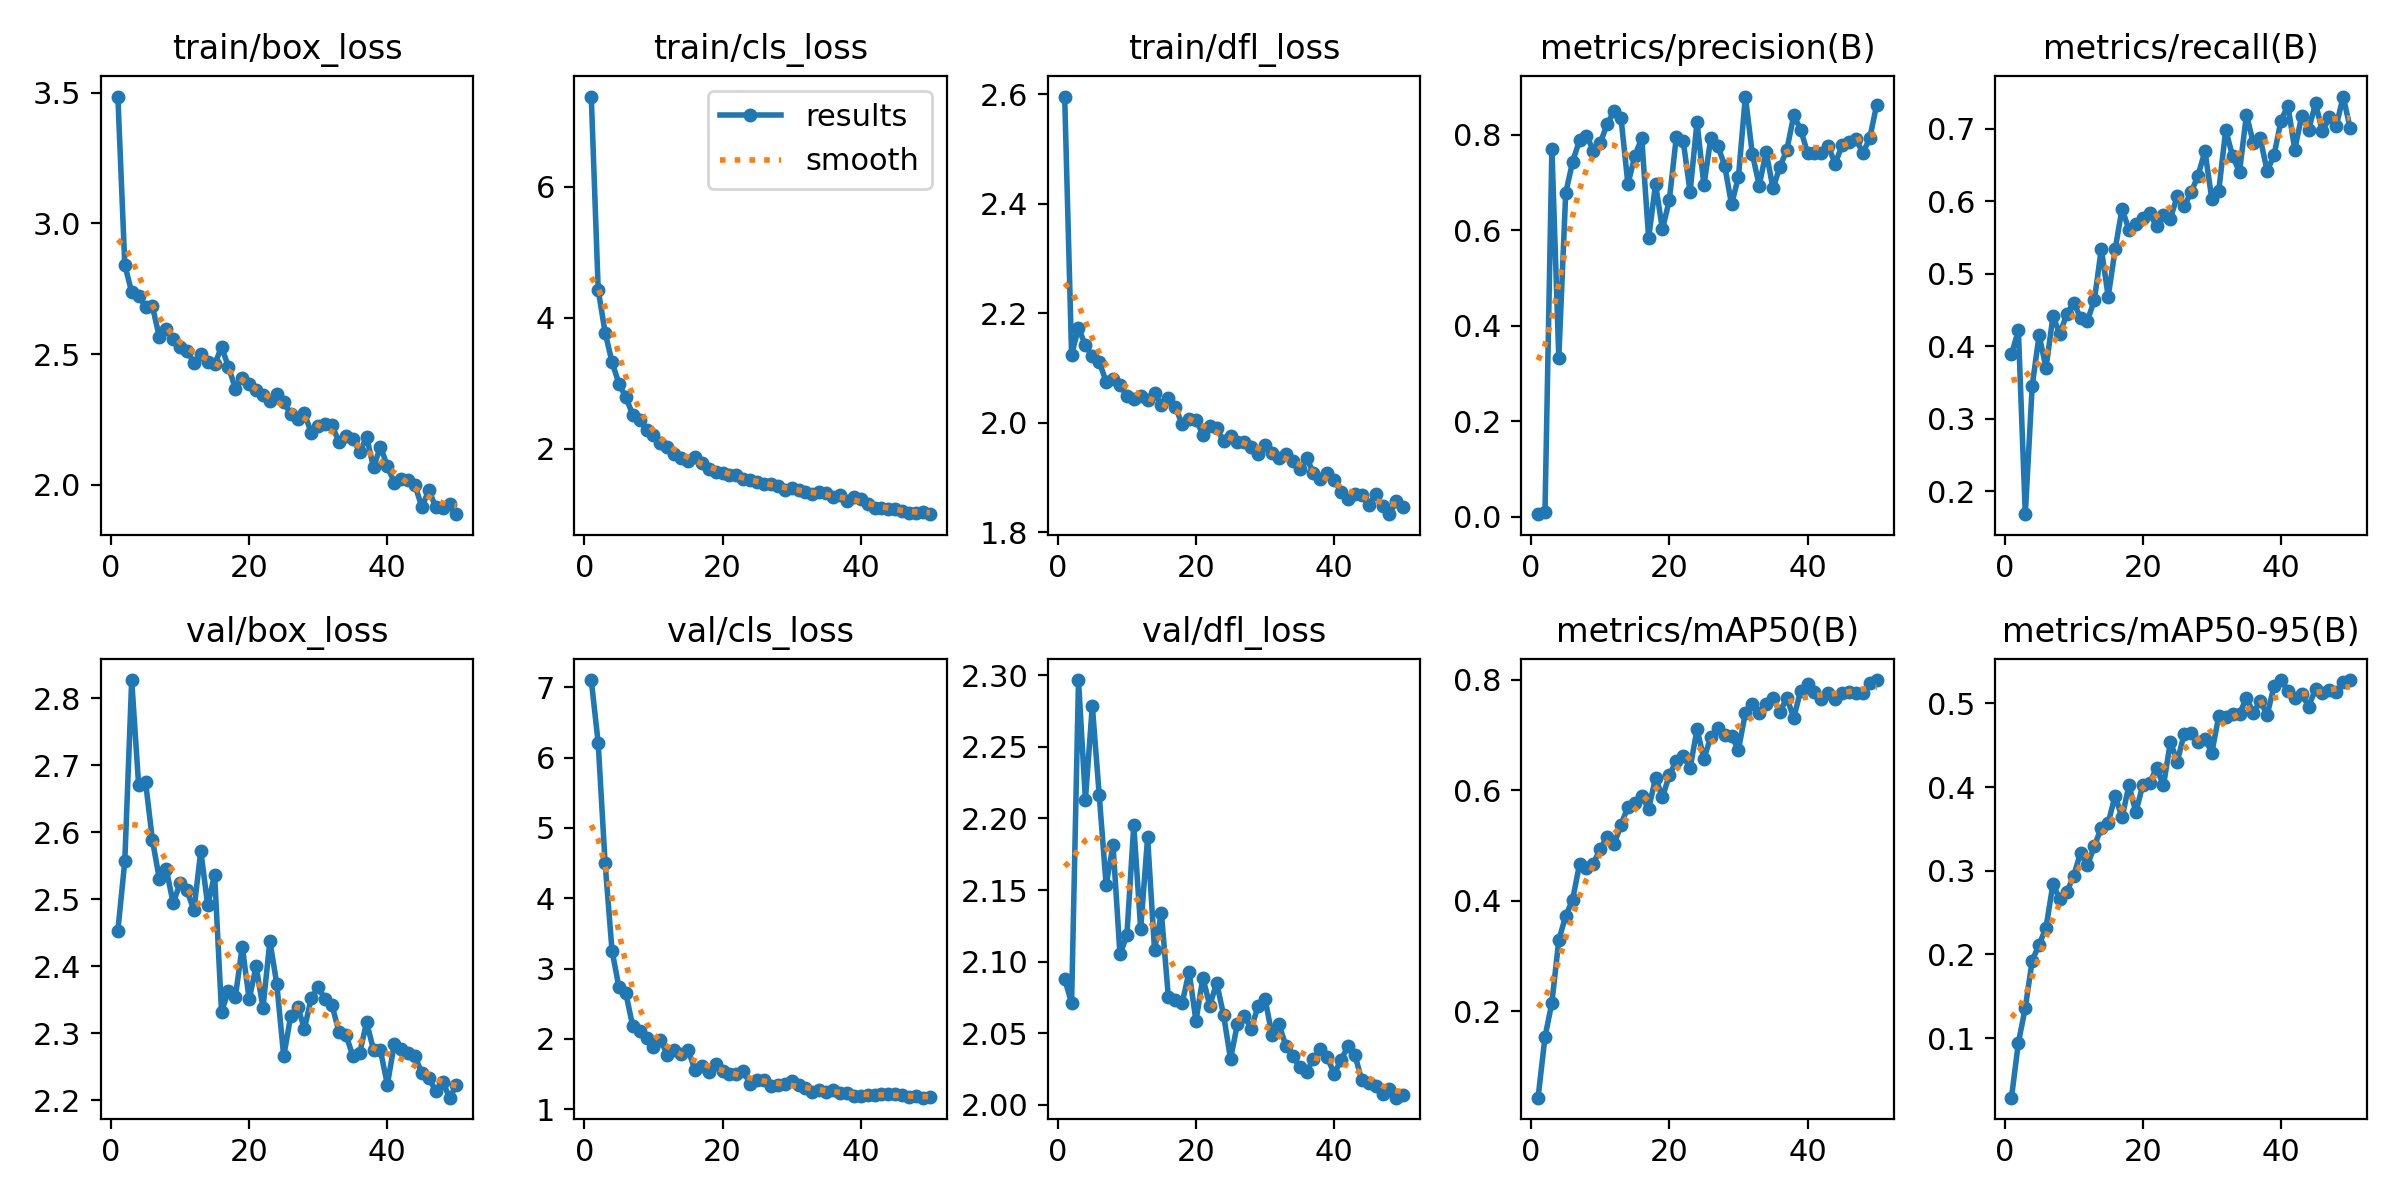

In [24]:
# Training result image
Image.open("/kaggle/working/runs/detect/train/results.png")

The values ​​in the result image are stable and in this 50-step training we performed, there were decreases in train_loss and val_loss values, which is a good situation. At the same time, the increase in metrics_precision, recall, mAP50, and mAP50-95 values ​​is also a good situation.

Detailed Analysis of the Graphs
- Train Loss:
    - Box Loss: Represents the error rate in predicting the bounding boxes of objects. As training progresses, this value generally decreases, indicating that your model is becoming better at predicting the locations of objects.
    - Cls Loss: Represents the error rate in classifying objects. This value also decreases as training progresses, indicating that your model is becoming better at correctly classifying objects.
    - Dfl Loss: This loss function represents the error rate in predicting the size and shape of objects. The decrease in dfl loss as training progresses indicates that your model is becoming better at predicting the size of objects.

- Validation Loss: Used to evaluate the generalizability of the results obtained on the training set on a previously unseen dataset (validation set). It is normal for the validation loss to be higher than the training loss, but the difference between the two is expected to decrease as training progresses. This is generally observed in the graphs.
  
- Metrics:
    - Precision: Represents the ratio of true positive predictions to total positive predictions. A high precision value indicates that the model has few false positive predictions.
    - Recall: Represents the ratio of true positive predictions to all actual positive examples. A high recall value indicates that the model is able to correctly find most of the true positive examples.
    - mAP (Mean Average Precision): It is the average of the average precision values calculated at different IoU (Intersection over Union) thresholds. The mAP value is a comprehensive metric used to evaluate the overall performance of the model. The increase in mAP50 and mAP50-95 values as training progresses indicates that your model's object detection performance is improving.

# Detection<a id='5'></a>
[Go Content](#cont)<br>
I will detect this with our model.

In [25]:
# We will perform the detection process using the weights that the model we trained achieved the best result in 50 steps of training.
model_predict = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

In [26]:
# Detection 1
model_predict.predict("/kaggle/working/data/test/images/maksssksksss136.png", save=True)  # predict on an image


image 1/1 /kaggle/working/data/test/images/maksssksksss136.png: 640x448 1 with_mask, 43.3ms
Speed: 2.0ms preprocess, 43.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'with_mask', 1: 'mask_weared_incorrect', 2: 'without_mask'}
 obb: None
 orig_img: array([[[168, 181, 156],
         [158, 171, 147],
         [151, 163, 139],
         ...,
         [143, 164, 166],
         [ 95, 121, 128],
         [ 87, 115, 124]],
 
        [[174, 187, 162],
         [163, 176, 151],
         [152, 164, 140],
         ...,
         [137, 159, 161],
         [ 92, 118, 126],
         [ 85, 113, 125]],
 
        [[176, 190, 166],
         [167, 181, 157],
         [154, 167, 143],
         ...,
         [131, 152, 156],
         [ 90, 115, 125],
         [ 81, 108, 121]],
 
        ...,
 
        [[173, 180, 151],
         [167, 171, 149],
         [156, 159, 139],
         ...,
         [ 54,  53,  50],
         [ 54,  54,  50],
         [ 54,  54,  50]],
 
        [[165, 172, 143],
         [160, 164, 142],
        

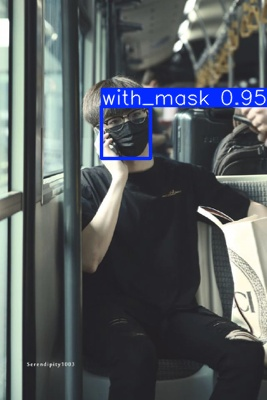

In [27]:
# Detection 1 Result
Image.open("/kaggle/working/runs/detect/predict/maksssksksss136.jpg")

In [28]:
# Detection 2
model_predict.predict("/kaggle/working/data/test/images/maksssksksss479.png", save=True) 


image 1/1 /kaggle/working/data/test/images/maksssksksss479.png: 640x512 1 with_mask, 45.0ms
Speed: 2.1ms preprocess, 45.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'with_mask', 1: 'mask_weared_incorrect', 2: 'without_mask'}
 obb: None
 orig_img: array([[[103, 126, 134],
         [106, 126, 137],
         [107, 127, 138],
         ...,
         [245, 176, 133],
         [244, 175, 133],
         [243, 176, 133]],
 
        [[103, 127, 135],
         [106, 126, 137],
         [107, 127, 138],
         ...,
         [245, 177, 134],
         [245, 175, 133],
         [245, 176, 133]],
 
        [[104, 127, 136],
         [106, 126, 137],
         [106, 126, 137],
         ...,
         [245, 177, 134],
         [245, 175, 133],
         [245, 176, 133]],
 
        ...,
 
        [[ 24,  15,  10],
         [ 22,  10,   8],
         [ 20,   9,   7],
         ...,
         [ 74,  51,  42],
         [ 68,  48,  39],
         [ 68,  48,  39]],
 
        [[ 27,  17,  12],
         [ 22,  10,   9],
        

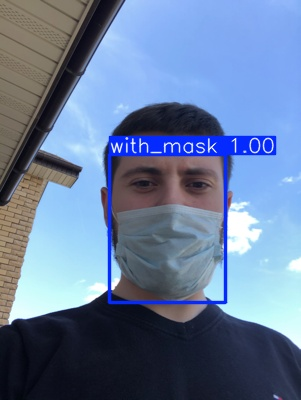

In [29]:
# Detection 2 Result
Image.open("/kaggle/working/runs/detect/predict/maksssksksss479.jpg")

In [30]:
# Detection 3
model_predict.predict("/kaggle/working/data/test/images/maksssksksss767.png", save=True) 


image 1/1 /kaggle/working/data/test/images/maksssksksss767.png: 640x448 1 with_mask, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'with_mask', 1: 'mask_weared_incorrect', 2: 'without_mask'}
 obb: None
 orig_img: array([[[252, 225, 181],
         [252, 225, 181],
         [252, 225, 181],
         ...,
         [253, 226, 185],
         [253, 226, 185],
         [253, 226, 185]],
 
        [[252, 225, 181],
         [252, 225, 181],
         [252, 225, 181],
         ...,
         [252, 225, 185],
         [252, 225, 185],
         [253, 226, 185]],
 
        [[252, 224, 181],
         [252, 224, 181],
         [252, 224, 181],
         ...,
         [252, 225, 185],
         [252, 225, 185],
         [253, 226, 185]],
 
        ...,
 
        [[155, 138, 132],
         [158, 141, 135],
         [165, 148, 141],
         ...,
         [170, 156, 149],
         [174, 160, 153],
         [174, 161, 153]],
 
        [[157, 138, 132],
         [164, 146, 138],
        

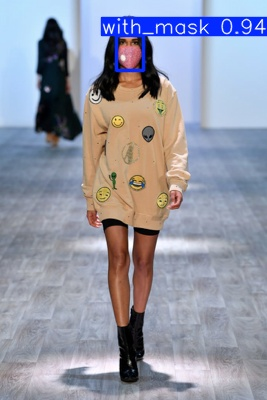

In [31]:
# Detection 3 Result
Image.open("/kaggle/working/runs/detect/predict/maksssksksss767.jpg")

I will ise another image, this image isn't in the test data.

In [32]:
# Download Image
!wget "https://onecms-res.cloudinary.com/image/upload/s--XV7DHKzY--/c_fill,g_auto,h_468,w_830/f_auto,q_auto/people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A"

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-11-03 14:11:13--  https://onecms-res.cloudinary.com/image/upload/s--XV7DHKzY--/c_fill,g_auto,h_468,w_830/f_auto,q_auto/people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A
Resolving onecms-res.cloudinary.com (onecms-res.cloudinary.com)... 23.215.56.40, 2600:1415:9c00:28f::523, 2600:1415:9c00:288::523
Connecting to onecms-res.cloudinary.com (onecms-res.cloudinary.com)|23.215.56.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44288 (43K) [image/jpeg]
Saving to: 'people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A'

people-wearing-mask 100%[===================>]  43.25K  --.-KB/s    in 0.002s  

2024-11-03 14:11:13 (23.2 MB/s) - 'people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A' saved [44288/44288]



In [33]:
# Rename image
os.rename("/kaggle/working/people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A", "image.jpg")

In [34]:
# Detection 4
model_predict.predict("/kaggle/working/image.jpg", save=True) 


image 1/1 /kaggle/working/image.jpg: 384x640 2 with_masks, 4 without_masks, 50.0ms
Speed: 2.6ms preprocess, 50.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'with_mask', 1: 'mask_weared_incorrect', 2: 'without_mask'}
 obb: None
 orig_img: array([[[ 41,  52,  50],
         [ 41,  52,  50],
         [ 38,  51,  49],
         ...,
         [156, 145, 131],
         [147, 136, 122],
         [141, 130, 116]],
 
        [[ 41,  52,  50],
         [ 41,  52,  50],
         [ 38,  51,  49],
         ...,
         [155, 144, 130],
         [146, 135, 121],
         [139, 128, 114]],
 
        [[ 41,  52,  50],
         [ 41,  52,  50],
         [ 38,  51,  49],
         ...,
         [153, 142, 128],
         [144, 133, 119],
         [137, 126, 112]],
 
        ...,
 
        [[227, 197, 180],
         [227, 197, 180],
         [226, 196, 179],
         ...,
         [147, 145, 144],
         [143, 141, 140],
         [140, 138, 137]],
 
        [[227, 197, 180],
         [227, 197, 180],
        

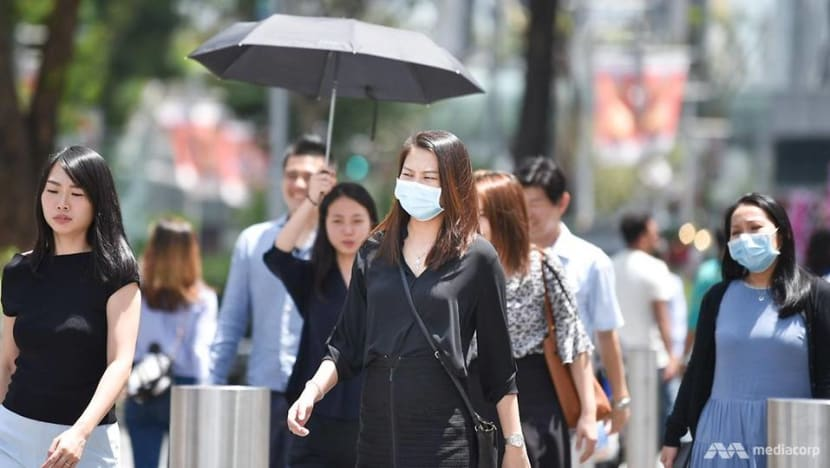

In [35]:
# Original image
Image.open("/kaggle/working/image.jpg")

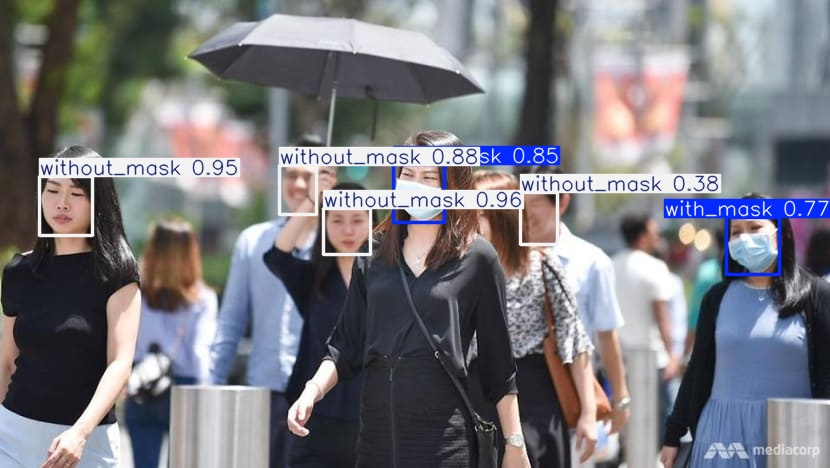

In [36]:
# Detection 4 Result
Image.open("/kaggle/working/runs/detect/predict/image.jpg")

# CONCLUSION <a id='6'></a>
[Go Content](#cont)
Thank you for reviewing my project this far. I hope this has been a project for you that sheds light on your path and expands your horizons. About to be selected for new projects!

![](https://media.tenor.com/s-J6vqs61fkAAAAC/bye-pikachu.gif)